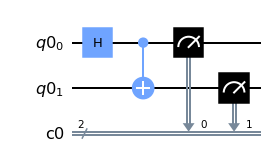

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
IBMQ.load_account()
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

%matplotlib inline
circuit.draw()
circuit.h(qr[0])
circuit.cx(qr[0], qr[1])

circuit.measure(qr, cr)
circuit.draw(output='mpl')

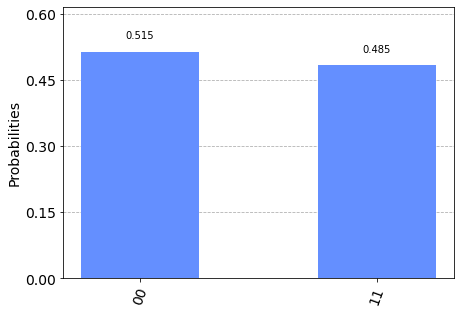

In [4]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()
plot_histogram(result.get_counts(circuit))

In [5]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()}; qubits = {qubit_count} job = {backend.status().pending_jobs}")

ibmq_qasm_simulator; qubits = simulated job = 3
ibmq_armonk; qubits = 1 job = 7
ibmq_santiago; qubits = 5 job = 2021
ibmq_bogota; qubits = 5 job = 7
ibmq_lima; qubits = 5 job = 8
ibmq_belem; qubits = 5 job = 1
ibmq_quito; qubits = 5 job = 7
simulator_statevector; qubits = simulated job = 4
simulator_mps; qubits = simulated job = 4
simulator_extended_stabilizer; qubits = simulated job = 4
simulator_stabilizer; qubits = simulated job = 4
ibmq_manila; qubits = 5 job = 32


In [8]:
#qcomp = provider.get_backend('ibmq_santiago')
qcomp = provider.get_backend('ibmq_lima')
job = execute(circuit, backend=qcomp)

In [9]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit))